# Get data from image chart

<img src="example_with_getdata_graph_digitizer.jpg" />


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
df=pd.read_excel('Psychrometric_Chart.xls')
df.rename(columns={'Line #1': 'x1',
                   'Unnamed: 1': 'y1',
                   'Line #2': 'x2',
                   'Unnamed: 4': 'y2',
                   'Line #3': 'x3',
                   'Unnamed: 7': 'y3',
                      }, inplace=True)
df=df[['x1','y1','x2','y2','x3','y3']][1:]
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)
df.head()

,x1,y1,x2,y2,x3,y3
0,0.169030,0.769206,-0.111180,2.274183,-0.314588,6.088884
1,0.319420,0.779049,0.037118,2.295892,-0.176741,6.148169
2,0.469808,0.794825,0.183326,2.325512,-0.040984,6.211409
3,0.618107,0.814556,0.331623,2.353153,0.090595,6.278606
4,0.762230,0.824401,0.477833,2.376840,0.224262,6.343825


<IPython.core.display.Javascript object>


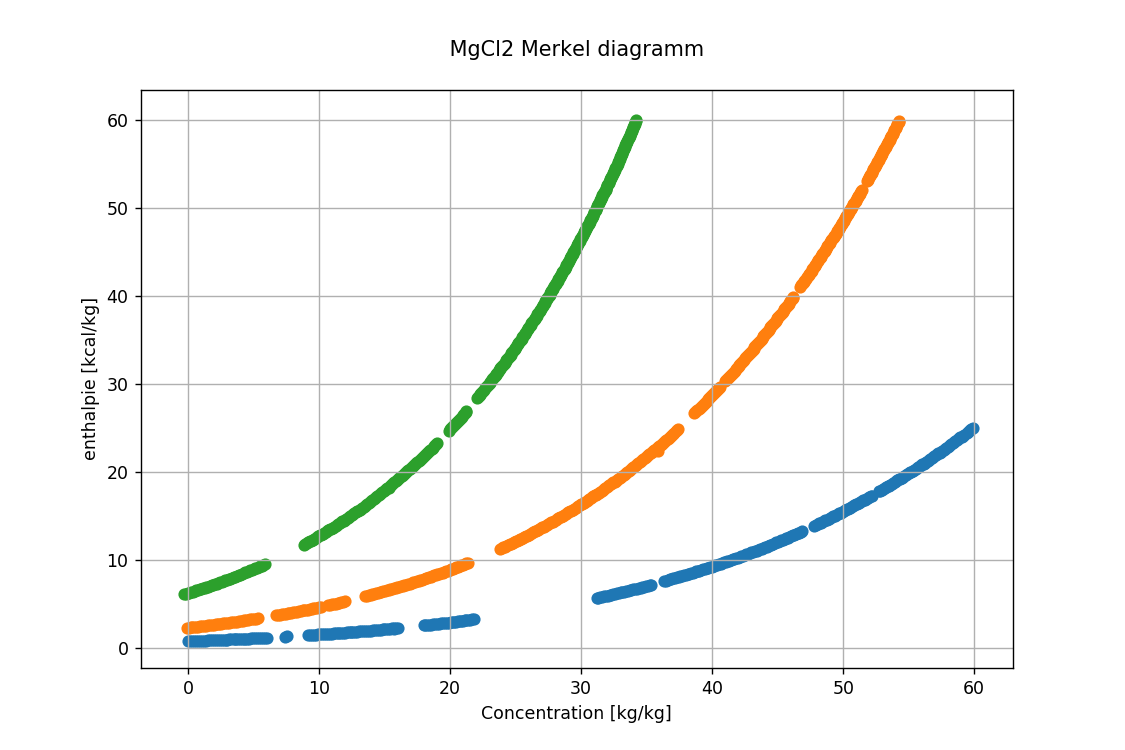

In [5]:
if True:
    x1=df.x1.tolist()
    y1=df.y1.tolist()
    x2=df.x2.tolist()
    y2=df.y2.tolist()
    x3=df.x3.tolist()
    y3=df.y3.tolist()
    plt.figure(figsize=(9,6))
    plt.grid()
    plt.xlabel('Absolute Humidity [kg/kg]')
    plt.ylabel('Temperature [°C]')
    plt.title('\n Psychro \n')
    plt.scatter(x1, y1)
    plt.scatter(x2, y2)
    plt.scatter(x3, y3)
    plt.show()